### Checking the Hypothesis : "The Zürich air quality has a negative relation with the number of cars"

In [3]:
# Loading the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the dataframe
df = pd.read_csv('../processed_data/full_data.csv')
print(df['Zweirad_schaff'].isnull().sum())
len(df['Zweirad_schaff'])
df

33589


,Datum,Zweirad_schaff,Zweirad_stampf,Personenwagen_schaff,Personenwagen_stampf,Lastwagen_schaff,Lastwagen_stampf,Hr,RainDur,T,...,WVs,StrGlo,p,NO2,NO,NOx,O3,CO,PM10,SO2
0,2007-01-01T00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,65.26,0.00,11.00,...,3.79,1.48,975.65,19.80,1.70,11.71,45.31,0.30,53.27,7.88
1,2007-01-01T01:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,68.60,5.63,11.79,...,5.27,1.50,974.98,13.26,2.88,9.24,54.38,0.27,27.84,3.21
2,2007-01-01T02:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,73.04,26.47,11.45,...,4.40,1.51,974.43,14.07,1.95,8.92,52.51,0.26,13.06,3.01
3,2007-01-01T03:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,78.79,57.95,11.11,...,4.11,1.49,973.78,12.26,1.69,7.77,53.81,0.24,10.81,2.97
4,2007-01-01T04:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,83.82,41.25,9.18,...,2.82,1.48,973.30,32.60,4.90,20.98,25.57,0.33,25.29,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131488,2021-12-31T17:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,71.37,0.00,10.96,...,1.46,0.02,974.52,43.06,23.13,41.06,5.15,0.44,11.75,0.95
131489,2021-12-31T18:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,74.19,0.00,9.90,...,1.32,0.02,975.30,41.24,16.01,34.40,5.82,0.44,11.64,1.05
131490,2021-12-31T19:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,76.60,0.00,9.50,...,1.54,0.02,976.00,41.26,27.80,43.86,5.07,0.41,17.14,1.20
131491,2021-12-31T20:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,77.54,0.00,9.12,...,1.30,0.02,976.24,39.77,26.21,41.81,3.64,0.42,19.24,1.23


In [5]:
## Data wrangling to leave total number of cars and Airquality

# Selecting the columns with Data, Vehicles, Air quality measures only.
df_vehicle = df.iloc[:, 0:7] 
df_air = df.iloc[:, [-7,-6,-5,-4,-3,-2,-1]]
df_cleaned = pd.concat([df_vehicle, df_air], axis=1)

# Adding a column named 'Total_vehicle'  
df_cleaned['Total_vehicle'] = df.iloc[:, 1:7].sum(axis=1)

# Remove the rows with vehicle number NA
df_cleaned = df_cleaned[df_cleaned['Total_vehicle'] > 0]
df_cleaned

,Datum,Zweirad_schaff,Zweirad_stampf,Personenwagen_schaff,Personenwagen_stampf,Lastwagen_schaff,Lastwagen_stampf,NO2,NO,NOx,O3,CO,PM10,SO2,Total_vehicle
6192,2007-09-16T00:00+0100,NaN,3.0,NaN,87.0,NaN,0.0,40.77,4.02,24.54,32.51,0.41,36.80,2.49,90.0
6193,2007-09-16T01:00+0100,NaN,1.0,NaN,46.0,NaN,0.0,28.98,3.06,17.60,36.29,0.35,36.16,2.57,47.0
6194,2007-09-16T02:00+0100,NaN,3.0,NaN,36.0,NaN,0.0,28.70,4.91,18.94,30.43,0.33,36.40,2.25,39.0
6195,2007-09-16T03:00+0100,NaN,1.0,NaN,48.0,NaN,0.0,23.68,6.33,17.46,30.77,0.33,34.38,2.05,49.0
6196,2007-09-16T04:00+0100,NaN,6.0,NaN,37.0,NaN,0.0,25.32,3.72,16.22,23.96,0.32,35.28,4.43,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131422,2021-12-28T23:00+0100,0.0,2.0,0.0,26.0,0.0,0.0,2.65,0.57,1.84,71.84,0.11,4.29,0.66,28.0
131423,2021-12-29T00:00+0100,0.0,1.0,0.0,23.0,0.0,0.0,2.37,0.27,1.46,69.05,0.10,4.02,0.64,24.0
131424,2021-12-29T01:00+0100,0.0,0.0,0.0,7.0,0.0,0.0,2.35,0.56,1.68,71.39,0.10,6.10,0.65,7.0
131425,2021-12-29T02:00+0100,0.0,0.0,0.0,3.0,0.0,0.0,1.22,0.12,0.73,75.21,0.10,8.25,0.69,3.0


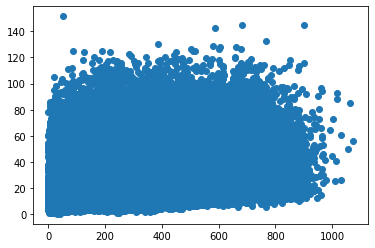

In [69]:
# Plotting the result : Air quality vs total vehicle
x = df_cleaned['Total_vehicle']
y = df_cleaned['NO2']
plt.scatter(x,y)

# Too many datas --> Gotta seperate the time scale.

Text(0, 0.5, 'SO2')

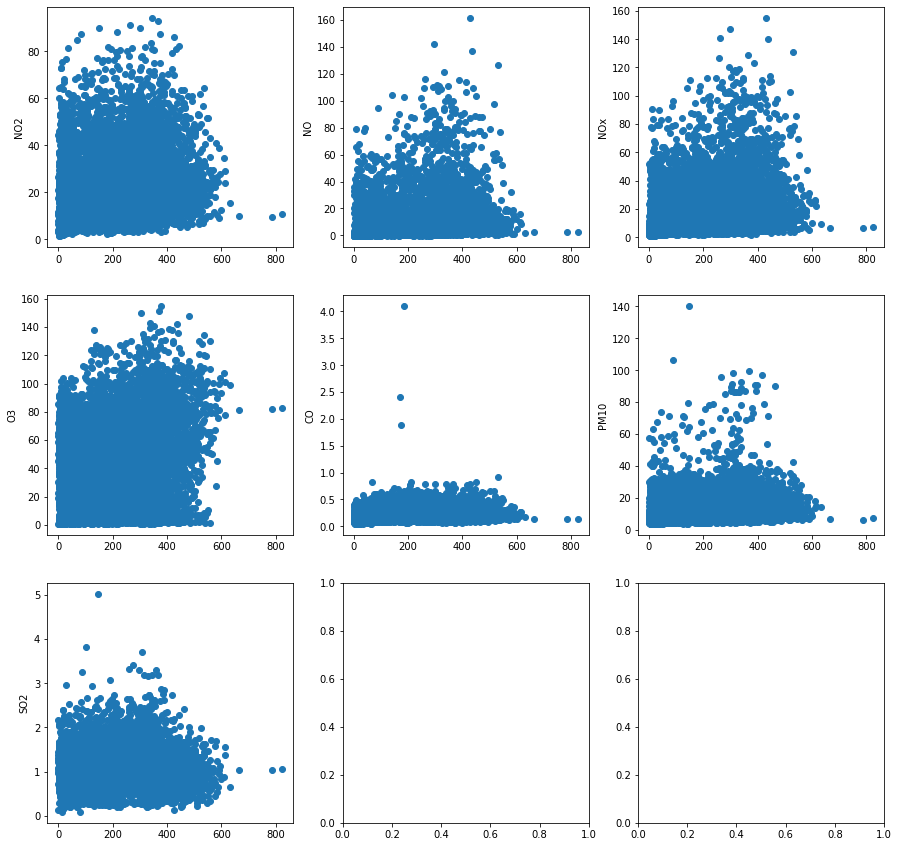

In [109]:
# Extracting df from 2021 only and checking for a trend

df_cleaned.dtypes
df_cleaned['Datum'] = pd.to_datetime(df_cleaned['Datum'])
df_2021 = df_cleaned[df_cleaned['Datum'] > '2021-01-01']

x = df_2021['Total_vehicle']
y1 = df_2021['NO2']
y2 = df_2021['NO']
y3 = df_2021['NOx']
y4 = df_2021['O3']
y5 = df_2021['CO']
y6 = df_2021['PM10']
y7 = df_2021['SO2']

fig, ax = plt.subplots(3,3, figsize=(15,15))
ax[0,0].scatter(x, y1)
ax[0,0].set_ylabel('NO2')

ax[0,1].scatter(x, y2)
ax[0,1].set_ylabel('NO')

ax[0,2].scatter(x, y3)
ax[0,2].set_ylabel('NOx')

ax[1,0].scatter(x, y4)
ax[1,0].set_ylabel('O3')

ax[1,1].scatter(x, y5)
ax[1,1].set_ylabel('CO')

ax[1,2].scatter(x, y6)
ax[1,2].set_ylabel('PM10')

ax[2,0].scatter(x, y7)
ax[2,0].set_ylabel('SO2')

# Still way too many data & No trend

Text(0, 0.5, 'SO2')

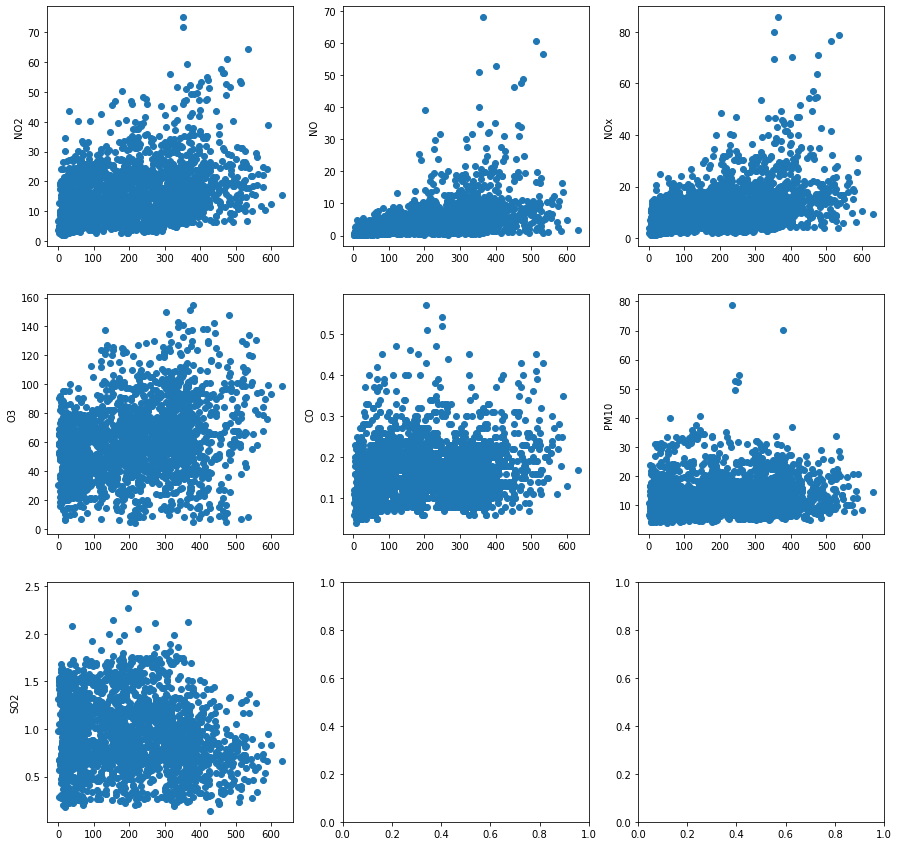

In [108]:
# Compare trends in same season. for example, summer season data.

df_summer = df_cleaned[df_cleaned['Datum'] > '2021-06-15']
df_summer = df_summer[df_summer['Datum'] < '2021-09-15']

x = df_summer['Total_vehicle']
y1 = df_summer['NO2']
y2 = df_summer['NO']
y3 = df_summer['NOx']
y4 = df_summer['O3']
y5 = df_summer['CO']
y6 = df_summer['PM10']
y7 = df_summer['SO2']

fig, ax = plt.subplots(3, 3, figsize=(15,15))
ax[0,0].scatter(x, y1)
ax[0,0].set_ylabel('NO2')

ax[0,1].scatter(x, y2)
ax[0,1].set_ylabel('NO')

ax[0,2].scatter(x, y3)
ax[0,2].set_ylabel('NOx')

ax[1,0].scatter(x, y4)
ax[1,0].set_ylabel('O3')

ax[1,1].scatter(x, y5)
ax[1,1].set_ylabel('CO')

ax[1,2].scatter(x, y6)
ax[1,2].set_ylabel('PM10')

ax[2,0].scatter(x, y7)
ax[2,0].set_ylabel('SO2')

Text(0, 0.5, 'SO2')

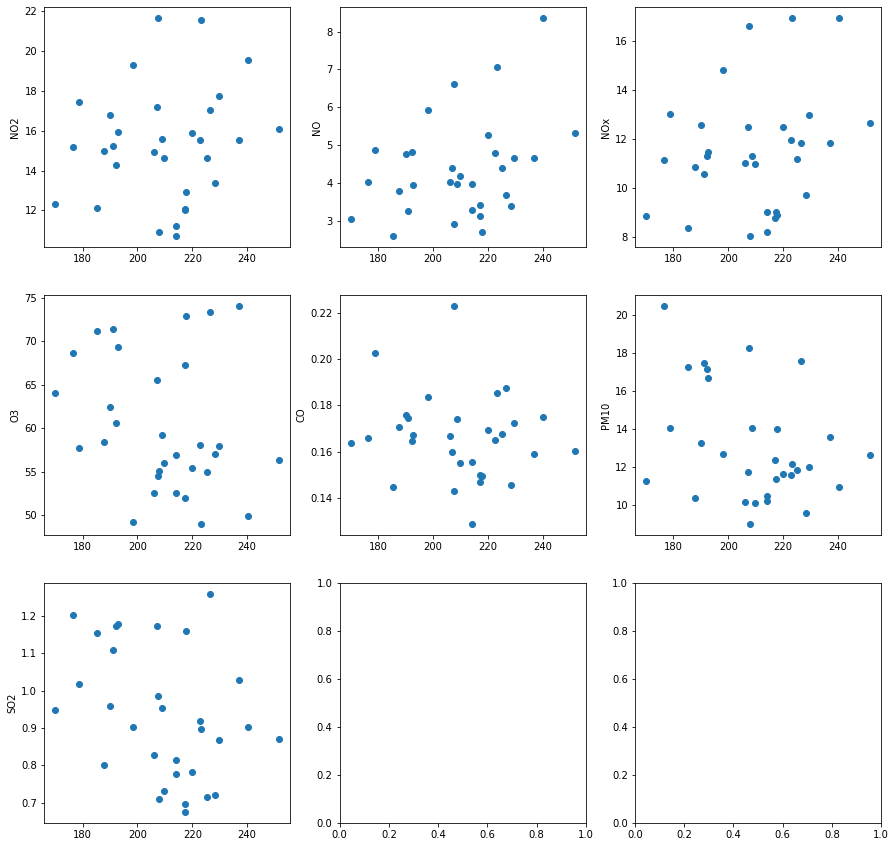

In [119]:
# The reason we have to many data is because we have 1 hour interval dataset
# For a reasonable analysis, we will transform the time interval into a day and use the average measures for gas & vehicle number
# The code below actually grouped all dates of the different months into the same date but still just to see the trend.
df_by_day = df_summer.groupby(df_summer.Datum.dt.day).mean()

x = df_by_day['Total_vehicle']
y1 = df_by_day['NO2']
y2 = df_by_day['NO']
y3 = df_by_day['NOx']
y4 = df_by_day['O3']
y5 = df_by_day['CO']
y6 = df_by_day['PM10']
y7 = df_by_day['SO2']

fig, ax = plt.subplots(3, 3, figsize=(15,15))
ax[0,0].scatter(x, y1)
ax[0,0].set_ylabel('NO2')

ax[0,1].scatter(x, y2)
ax[0,1].set_ylabel('NO')

ax[0,2].scatter(x, y3)
ax[0,2].set_ylabel('NOx')

ax[1,0].scatter(x, y4)
ax[1,0].set_ylabel('O3')

ax[1,1].scatter(x, y5)
ax[1,1].set_ylabel('CO')

ax[1,2].scatter(x, y6)
ax[1,2].set_ylabel('PM10')

ax[2,0].scatter(x, y7)
ax[2,0].set_ylabel('SO2')

# and there was no trend. (wow)

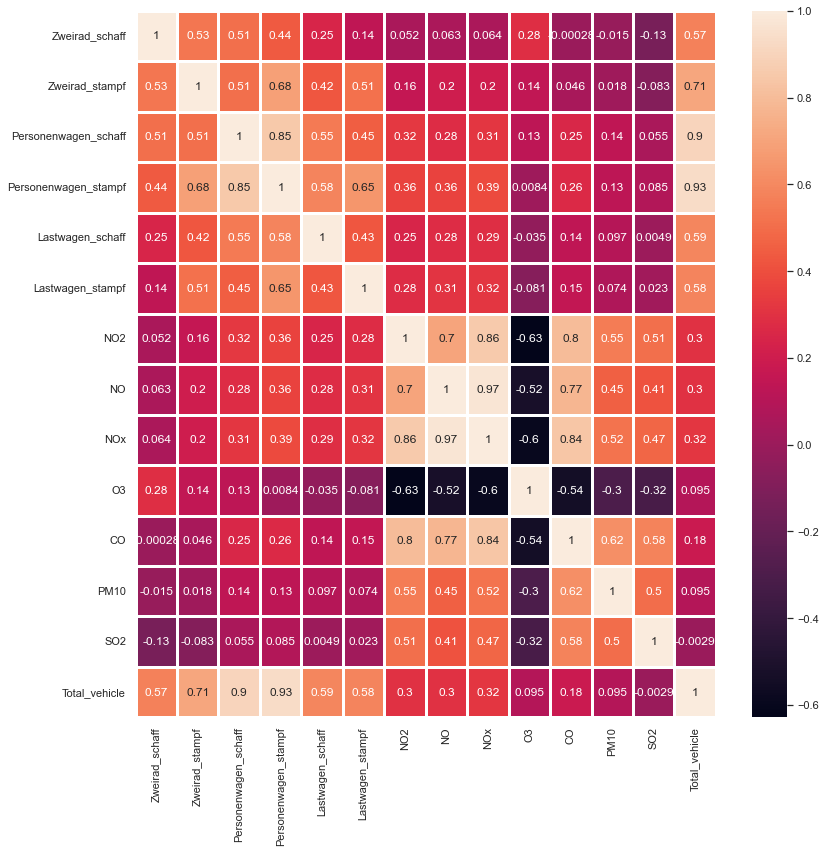

In [9]:
sns.set(rc = {'figure.figsize':(13,13)})
correlation_plot = sns.heatmap(df_cleaned.corr(), annot=True, linewidth=3)
